<a href="https://colab.research.google.com/github/mrfaizahamed/Air-Quality-Index-Classification---By-using-Genetic-Algorithm/blob/main/Final_Project(SMOTE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/city_day.csv')
df.head(-1)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
data=df.dropna()
data.info()
print(data['AQI_Bucket'].unique())
data=data.drop('Xylene', axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB
['Moderate' 'Poor' 'Very Poor' 'Satisfactory' 'Good' 'Severe']


In [ ]:
visakhapatnam_data = data[data['City'] == 'Visakhapatnam']
visakhapatnam_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28075,Visakhapatnam,2016-07-07,35.33,84.31,16.95,44.35,34.22,12.06,0.84,5.07,25.24,4.87,9.37,81.0,Satisfactory
28076,Visakhapatnam,2016-07-08,40.64,92.73,28.48,52.89,47.01,11.91,1.07,6.57,16.24,6.46,12.20,112.0,Moderate
28077,Visakhapatnam,2016-07-09,33.25,77.65,23.32,45.37,39.49,12.77,1.00,8.79,18.38,5.51,9.55,81.0,Satisfactory
28078,Visakhapatnam,2016-07-10,26.64,69.68,11.03,36.51,26.00,12.82,0.88,9.97,27.98,4.12,6.82,81.0,Satisfactory
28079,Visakhapatnam,2016-07-11,23.92,70.52,13.89,39.01,29.35,12.46,0.89,9.72,24.73,3.87,7.32,79.0,Satisfactory
28080,Visakhapatnam,2016-07-12,28.42,84.49,11.59,42.76,29.47,13.49,1.09,8.99,27.01,5.19,7.90,79.0,Satisfactory
28081,Visakhapatnam,2016-07-13,35.71,75.77,13.83,48.40,33.88,13.12,1.07,9.33,28.83,6.90,10.03,90.0,Satisfactory
28082,Visakhapatnam,2016-07-14,37.09,98.23,14.05,49.90,34.78,13.30,1.09,9.28,33.36,5.24,8.33,93.0,Satisfactory
28083,Visakhapatnam,2016-07-15,43.67,103.08,12.10,49.19,32.98,13.52,1.02,6.74,26.01,6.66,11.08,112.0,Moderate
28084,Visakhapatnam,2016-07-16,44.76,111.15,10.93,47.01,31.05,13.58,1.10,4.76,33.86,6.27,8.15,104.0,Moderate


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = visakhapatnam_data.drop(columns=['City', 'Date','AQI_Bucket'],axis=1)
y = visakhapatnam_data['AQI_Bucket']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a SMOTE pipeline
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
])

# Apply SMOTE on the training set
X_resampled, y_resampled = smote_pipeline.fit_resample(X_train, y_train)

visakhapatnam_balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='AQI_Bucket')], axis=1)
visakhapatnam_balanced_data.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,44.44,81.90,4.92,25.00,18.04,14.71,0.86,7.73,26.08,4.04,10.17,91.0,Satisfactory
1,66.93,100.71,23.20,68.56,51.78,15.93,1.34,18.09,28.29,8.70,14.62,122.0,Moderate
2,35.24,84.35,6.10,46.12,29.49,10.57,0.50,10.84,42.30,5.24,12.24,101.0,Moderate
3,20.03,47.30,3.46,13.26,9.86,7.28,0.39,14.46,18.31,2.03,4.23,46.0,Good
4,123.90,202.38,16.37,60.49,45.40,17.16,1.45,15.18,66.62,4.47,6.70,296.0,Poor


<ipython-input-7-00d6c20894da>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=visakhapatnam_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


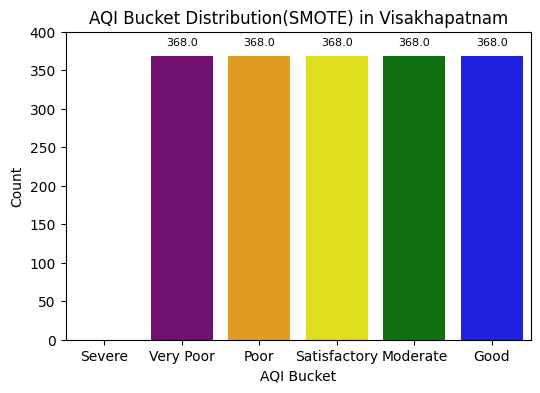

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='AQI_Bucket', data=visakhapatnam_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 400)
plt.title('AQI Bucket Distribution(SMOTE) in Visakhapatnam')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load the balanced dataset after applying SMOTE
X = visakhapatnam_balanced_data.drop(['AQI_Bucket'], axis=1)
y = visakhapatnam_balanced_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.35, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Convergence threshold for the genetic algorithm
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_1_smote = accuracy_score(y_numeric, y_pred_final)
    final_precision_1_smote = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_1_smote = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_1_smote)
    print("Final Precision:", final_precision_1_smote)
    print("Final Recall:", final_recall_1_smote)


gen	nevals	avg    	std      	min     	max     
0  	100   	0.43927	0.0790176	0.285714	0.736025
1  	58    	0.493339	0.0920011	0.315217	0.736025
2  	68    	0.538665	0.105347 	0.291925	0.746894
3  	69    	0.584255	0.109638 	0.262422	0.75    
4  	75    	0.628447	0.102834 	0.315217	0.75    
5  	74    	0.658509	0.0967633	0.377329	0.770186
6  	65    	0.681801	0.0959634	0.338509	0.833851
7  	69    	0.705652	0.0692774	0.40528 	0.833851
8  	78    	0.701894	0.0909681	0.341615	0.833851
9  	80    	0.72618 	0.0595659	0.456522	0.836957
10 	64    	0.724627	0.0904831	0.437888	0.84472 
11 	70    	0.73632 	0.107262 	0.42236 	0.84472 
12 	72    	0.777034	0.0864337	0.445652	0.849379
13 	70    	0.795419	0.0890344	0.448758	0.871118
14 	73    	0.808385	0.0922721	0.340062	0.872671
15 	85    	0.800171	0.107084 	0.347826	0.874224
16 	76    	0.803152	0.106099 	0.409938	0.874224
17 	75    	0.813835	0.110287 	0.374224	0.88354 
18 	74    	0.800761	0.124875 	0.371118	0.886646
19 	74    	0.819876	0.109202 	0.395963	0.8

In [ ]:
Delhi_data = data[data['City'] == 'Delhi']
Delhi_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,Very Poor
10234,Delhi,2015-01-06,149.58,252.10,17.21,37.84,42.46,134.97,9.44,3.66,26.83,3.63,7.35,318.0,Very Poor
10235,Delhi,2015-01-07,217.87,376.51,26.99,40.15,52.41,134.82,9.78,5.82,28.96,4.93,9.42,353.0,Very Poor
10236,Delhi,2015-01-08,229.90,360.95,23.34,43.16,51.21,138.13,11.01,3.31,30.51,5.80,11.40,383.0,Very Poor
10237,Delhi,2015-01-09,201.66,397.43,19.18,38.56,45.60,140.60,11.09,3.48,32.94,5.25,11.12,375.0,Very Poor
10238,Delhi,2015-01-10,221.02,361.74,24.79,46.39,55.19,134.06,9.70,5.91,34.12,4.87,9.44,376.0,Very Poor


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = Delhi_data.drop(columns=['City', 'Date','AQI_Bucket'],axis=1)
y = Delhi_data['AQI_Bucket']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE pipeline
smote_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
])

# Apply SMOTE on the training set
X_resampled, y_resampled = smote_pipeline.fit_resample(X_train, y_train)

Delhi_balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='AQI_Bucket')], axis=1)
Delhi_balanced_data.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,65.78,177.08,30.83,40.86,47.61,31.58,1.13,12.70,38.52,3.29,45.58,148.0,Moderate
1,107.65,152.98,31.58,36.19,49.20,40.15,1.14,9.69,18.97,3.71,24.40,287.0,Poor
2,205.41,393.20,28.46,47.29,57.88,131.10,10.98,5.54,50.37,5.93,10.59,379.0,Very Poor
3,32.39,69.73,14.28,28.74,29.43,39.30,0.81,10.43,26.11,1.39,23.10,80.0,Satisfactory
4,108.64,274.05,27.80,57.07,61.05,32.19,1.28,17.01,59.45,3.36,5.14,242.0,Poor


<ipython-input-11-97e9598f676d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=Delhi_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


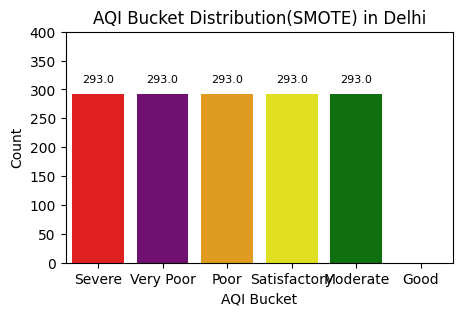

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(5,3))
ax=sns.countplot(x='AQI_Bucket', data=Delhi_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 400)
plt.title('AQI Bucket Distribution(SMOTE) in Delhi')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load the balanced dataset after applying SMOTE
X = Delhi_balanced_data.drop([ 'AQI_Bucket'], axis=1)
y = Delhi_balanced_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.35, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Convergence threshold for the genetic algorithm
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_2_smote = accuracy_score(y_numeric, y_pred_final)
    final_precision_2_smote = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_2_smote = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_2_smote)
    print("Final Precision:", final_precision_2_smote)
    print("Final Recall:", final_recall_2_smote)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std      	min     	max     
0  	100   	0.472047	0.0769967	0.341131	0.748538
1  	58    	0.521891	0.0850152	0.34308 	0.814815
2  	68    	0.562086	0.0675974	0.37232 	0.684211
3  	69    	0.570292	0.0876518	0.352827	0.769981
4  	75    	0.606452	0.0830203	0.366472	0.769981
5  	74    	0.619649	0.0933853	0.346979	0.787524
6  	65    	0.643704	0.0933601	0.382066	0.787524
7  	69    	0.680526	0.0820776	0.376218	0.787524
8  	78    	0.703255	0.0884178	0.366472	0.820663
9  	80    	0.730858	0.0645246	0.415205	0.820663
10 	64    	0.737544	0.0839962	0.413255	0.846004
11 	70    	0.747602	0.08729  	0.368421	0.846004
12 	72    	0.768051	0.0747601	0.421053	0.847953
13 	70    	0.772749	0.0830419	0.413255	0.859649
14 	73    	0.780351	0.0703927	0.356725	0.877193
15 	85    	0.7746  	0.0988047	0.37037 	0.877193
16 	76    	0.792963	0.0910059	0.452242	0.888889
17 	75    	0.802359	0.100937 	0.424951	0.888889
18 	74    	0.796569	0.104742 	0.389864	0.888889
19 	74    	0.818246	0.0949904	0.446394	0

In [ ]:
Hyderabad_data = data[data['City'] == 'Hyderabad']
Hyderabad_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
14828,Hyderabad,2015-09-08,91.82,32.94,5.41,28.93,23.37,24.94,0.48,7.98,27.04,1.01,5.74,179.0,Moderate
14829,Hyderabad,2015-09-09,35.56,40.81,4.02,31.15,24.31,24.81,0.57,4.93,22.48,1.41,7.61,162.0,Moderate
14830,Hyderabad,2015-09-10,45.64,44.89,7.06,28.96,25.58,24.80,0.73,5.29,24.69,1.25,7.84,76.0,Satisfactory
14831,Hyderabad,2015-09-11,60.88,51.27,5.15,30.64,24.22,25.86,0.53,5.16,24.11,1.09,5.42,140.0,Moderate
14832,Hyderabad,2015-09-12,65.61,41.31,3.40,26.03,20.37,24.78,0.57,5.44,25.47,0.83,4.39,128.0,Moderate
14833,Hyderabad,2015-09-13,60.02,36.67,2.35,19.82,14.51,21.68,0.49,4.02,37.70,0.79,4.07,164.0,Moderate
14834,Hyderabad,2015-09-14,73.21,35.28,2.82,19.94,15.40,21.40,0.57,5.96,34.11,0.52,2.44,169.0,Moderate
14835,Hyderabad,2015-09-15,83.87,30.48,3.10,20.00,16.31,22.34,0.59,5.99,25.88,0.63,2.66,189.0,Moderate
14836,Hyderabad,2015-09-16,56.53,37.06,2.39,18.53,13.81,20.69,0.39,4.97,31.05,0.51,2.39,142.0,Moderate
14837,Hyderabad,2015-09-17,33.03,29.64,1.37,12.01,10.82,20.92,0.41,2.37,24.33,0.50,2.39,112.0,Moderate


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = Hyderabad_data.drop(columns=['City', 'Date','AQI_Bucket'],axis=1)
y = Hyderabad_data['AQI_Bucket']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SMOTE pipeline
random_oversample_pipeline = Pipeline([
    ('random_oversample', RandomOverSampler(random_state=42)),
])

# Apply SMOTE on the training set
X_resampled, y_resampled = random_oversample_pipeline.fit_resample(X_train, y_train)

Hyderabad_balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='AQI_Bucket')], axis=1)
Hyderabad_balanced_data.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,17.75,29.98,2.93,14.34,8.62,9.48,0.36,3.99,17.96,0.22,1.12,36.0,Good
1,63.29,99.76,5.44,12.41,16.46,10.27,1.08,5.80,44.08,1.02,5.70,117.0,Moderate
2,16.23,41.54,3.95,23.21,15.22,12.73,0.26,5.93,17.50,0.24,1.79,41.0,Good
3,35.63,92.70,2.79,30.32,18.23,15.16,0.61,5.33,46.52,0.86,4.29,86.0,Satisfactory
4,57.16,177.19,5.39,70.75,17.53,39.41,0.17,9.60,30.25,0.23,1.50,156.0,Moderate


<ipython-input-15-568528704281>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=Hyderabad_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


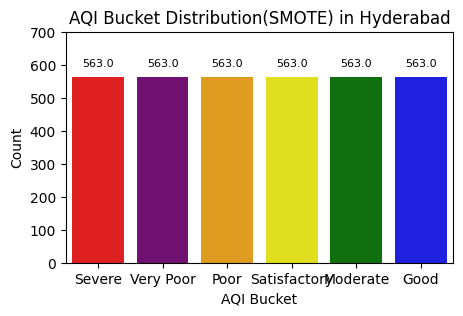

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(5,3))
ax=sns.countplot(x='AQI_Bucket', data=Hyderabad_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 700)
plt.title('AQI Bucket Distribution(SMOTE) in Hyderabad')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load the balanced dataset after applying SMOTE
X = Hyderabad_balanced_data.drop([ 'AQI_Bucket'], axis=1)
y = Hyderabad_balanced_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.35, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Convergence threshold for the genetic algorithm
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_3_smote = accuracy_score(y_numeric, y_pred_final)
    final_precision_3_smote = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_3_smote = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_3_smote)
    print("Final Precision:", final_precision_3_smote)
    print("Final Recall:", final_recall_3_smote)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std      	min     	max     
0  	100   	0.559417	0.0589089	0.455621	0.703297
1  	58    	0.601217	0.0571721	0.475909	0.707523
2  	68    	0.627194	0.0660607	0.433643	0.732883
3  	69    	0.635706	0.0655419	0.475063	0.743026
4  	75    	0.65574 	0.0709501	0.444632	0.745562
5  	74    	0.66503 	0.0622823	0.45224 	0.745562
6  	65    	0.671826	0.06462  	0.489434	0.787828
7  	69    	0.691234	0.0564777	0.510566	0.763314
8  	78    	0.687464	0.0588383	0.508876	0.761623
9  	80    	0.690955	0.061746 	0.440406	0.765004
10 	64    	0.678047	0.0800181	0.471682	0.765004
11 	70    	0.684801	0.0774091	0.474218	0.787828
12 	72    	0.705968	0.0635153	0.487743	0.79459 
13 	70    	0.720178	0.0617048	0.499577	0.79459 
14 	73    	0.714801	0.0842753	0.393914	0.822485
15 	85    	0.699324	0.0816918	0.516484	0.822485
16 	76    	0.711268	0.0853243	0.463229	0.817413
17 	75    	0.737751	0.0703089	0.550296	0.822485
18 	74    	0.736314	0.086206 	0.467456	0.824176
19 	74    	0.761226	0.0734984	0.478445	0

In [ ]:
Patna_data = data[data['City'] == 'Patna']
Patna_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
25531,Patna,2019-12-24,242.58,158.08,8.62,42.92,47.85,49.80,2.75,10.66,33.28,3.79,8.30,449.0,Severe
25532,Patna,2019-12-25,151.31,198.02,21.11,31.33,43.25,49.83,1.47,8.33,14.76,2.84,1.49,336.0,Very Poor
25533,Patna,2019-12-26,123.41,165.55,19.81,22.25,39.17,45.50,1.20,8.66,17.65,2.68,1.24,288.0,Poor
25534,Patna,2019-12-27,124.26,161.09,18.73,34.37,49.02,39.66,1.13,7.04,16.89,2.19,1.02,256.0,Poor
25535,Patna,2019-12-28,164.46,209.11,19.61,32.19,49.18,32.82,1.38,7.62,11.68,3.89,0.98,298.0,Poor
25536,Patna,2019-12-29,161.92,208.07,20.62,29.77,48.57,25.25,1.42,8.13,13.67,3.20,0.87,331.0,Very Poor
25537,Patna,2019-12-30,188.15,232.98,31.10,34.50,64.26,27.59,1.81,8.64,13.74,3.23,1.38,333.0,Very Poor
25538,Patna,2019-12-31,195.81,246.00,46.50,36.69,82.49,28.80,2.41,7.45,15.66,4.76,1.74,364.0,Very Poor
25539,Patna,2020-01-01,214.23,271.06,45.23,36.74,81.09,27.28,2.71,7.99,16.47,4.49,2.17,364.0,Very Poor
25540,Patna,2020-01-02,207.20,269.10,46.55,35.29,78.83,31.46,3.03,9.22,16.96,7.08,3.16,372.0,Very Poor


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = Patna_data.drop(columns=['City', 'Date','AQI_Bucket'],axis=1)
y = Patna_data['AQI_Bucket']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a SMOTE pipeline
random_oversample_pipeline = Pipeline([
    ('random_oversample', RandomOverSampler(random_state=42)),
])

# Apply SMOTE on the training set
X_resampled, y_resampled = random_oversample_pipeline.fit_resample(X_train, y_train)

Patna_balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='AQI_Bucket')], axis=1)
Patna_balanced_data.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,42.54,93.27,35.99,32.15,27.13,11.28,0.78,4.40,38.16,2.50,5.00,111.0,Moderate
1,25.62,55.48,22.42,25.52,33.97,2.74,0.77,3.24,28.08,1.20,3.50,84.0,Satisfactory
2,66.21,123.68,50.88,42.59,90.80,21.29,0.84,11.35,16.42,0.46,5.48,171.0,Moderate
3,41.66,110.63,19.13,13.53,11.16,6.57,0.63,4.01,30.70,2.23,8.87,110.0,Moderate
4,76.02,106.78,29.64,23.89,52.81,26.89,1.37,8.12,15.59,2.48,0.82,183.0,Moderate


<ipython-input-19-64ac3d5b0b98>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='AQI_Bucket', data=Patna_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])


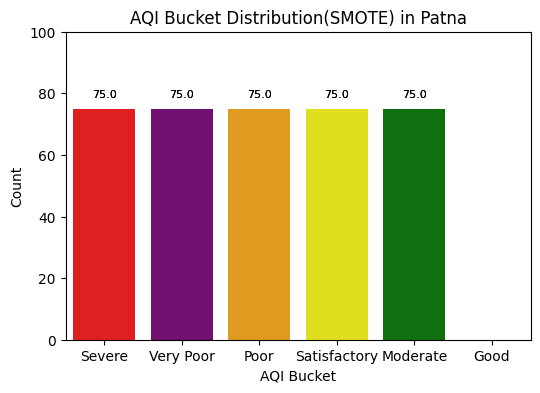

In [ ]:
aqi_order = {'Severe': 1, 'Very Poor': 2, 'Poor': 3, 'Satisfactory': 4, 'Moderate': 5, 'Good': 6}

# Define a custom color palette for each AQI bucket
aqi_colors = {'Severe': 'red', 'Very Poor': 'purple', 'Poor': 'orange',
              'Satisfactory': 'yellow', 'Moderate': 'green', 'Good': 'blue'}

# Plot the bar plot
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='AQI_Bucket', data=Patna_balanced_data, order=aqi_order.keys(), palette=[aqi_colors[x] for x in aqi_order.keys()])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
ax.set_ylim(0, 100)
plt.title('AQI Bucket Distribution(SMOTE) in Patna')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import random

# Set a seed for reproducibility
seed = 30
random.seed(seed)
np.random.seed(seed)

# Simple ELM Classifier implementation using NumPy
class ELMClassifier:
    def __init__(self, hid_num):
        self.hid_num = hid_num
        self.input_weights = None
        self.bias = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def rbf_kernel(self, x, center, gamma):
        x_expanded = np.expand_dims(x, axis=1)
        squared_diff = (x_expanded - center) ** 2
        sum_squared_diff = np.sum(squared_diff, axis=-1)
        rbf_result = np.exp(-gamma * sum_squared_diff)
        return rbf_result

    def fit(self, X, y):
        input_size = X.shape[1]
        self.input_weights = np.random.uniform(-1, 1, (self.hid_num, input_size))
        self.bias = np.random.uniform(-1, 1, (self.hid_num, 1))
        gamma = 1.0 / input_size
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Convert y to one-hot encoding
        y_one_hot = np.eye(6)[y]

        # Calculate output weights using Moore-Penrose pseudo-inverse
        self.output_weights = np.linalg.pinv(hidden_output_with_bias.T @ hidden_output_with_bias) @ hidden_output_with_bias.T @ y_one_hot

    def predict(self, X):
        gamma = 1.0 / X.shape[1]
        hidden_output = self.rbf_kernel(X, self.input_weights, gamma)
        hidden_output_with_bias = hidden_output + self.bias.T

        # Calculate predicted probabilities for each class
        output_probabilities = hidden_output_with_bias @ self.output_weights

        # Convert probabilities to predicted class labels (0 to 5)
        predicted_labels = np.argmax(output_probabilities, axis=1)
        return predicted_labels

# Load the balanced dataset after applying SMOTE
X = Patna_balanced_data.drop([ 'AQI_Bucket'], axis=1)
y = Patna_balanced_data['AQI_Bucket']

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Replace 0 values with the mean of the respective columns
X = X.replace(0, X.mean())

# Convert AQI_Bucket to numerical labels
label_mapping = {'Severe': 0, 'Very Poor': 1, 'Poor': 2, 'Satisfactory': 3, 'Moderate': 4, 'Good': 5}
y_numeric = y.map(label_mapping)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.35, random_state=42)

# Define the Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_gene", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Update evalOneMax function to handle classification
def evalOneMax(individual):
    individual = np.array(individual).reshape(1, -1)
    transformation_matrix = np.array(individual).reshape(12, 1)

    if transformation_matrix.shape[0] != X_train.shape[1]:
        print("Error: Transformation matrix dimensions are not compatible.")
        print("Transformation matrix shape:", transformation_matrix.shape)
        print("X_train shape:", X_train.shape)
        return 0,  # Return zero value in case of error

    transformation_matrix = transformation_matrix.T
    X_train_transformed = X_train @ transformation_matrix.T
    X_test_transformed = X_test @ transformation_matrix.T

    if X_train_transformed.shape[1] != 1 or X_test_transformed.shape[1] != 1:
        print("Error: Output shapes after transformation are not correct.")
        print("X_train_transformed shape:", X_train_transformed.shape)
        print("X_test_transformed shape:", X_test_transformed.shape)
        return 0,  # Return zero value in case of error

    elm_classifier = ELMClassifier(hid_num=75)
    elm_classifier.fit(X_train_transformed, y_train)
    y_pred_train = elm_classifier.predict(X_train_transformed)
    y_pred_test = elm_classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred_test)

    fitness_value = accuracy
    return fitness_value,

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Convergence threshold for the genetic algorithm
CONVERGENCE_THRESHOLD = 0.6
pop=toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)


# Define the convergence criteria
def convergence_criterion(logbook, threshold):
    fits = [logbook[i]['max'] for i in range(len(logbook))]
    return max(fits) >= threshold
# Run the GA with early stopping
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.3, ngen=50, stats=stats, halloffame=hof, verbose=True)

# Check convergence
if convergence_criterion(log, CONVERGENCE_THRESHOLD):
    print(f"Convergence achieved with threshold {CONVERGENCE_THRESHOLD}.")

# Use the best individual for final evaluation
best_individual = hof[0]
best_transformation_matrix = np.array(best_individual).reshape(1, -1)

if best_transformation_matrix.shape[1] != X_scaled.shape[1]:
    print("Error: Transformation matrix dimensions are not compatible.")
else:
    X_scaled_transformed = X_scaled @ best_transformation_matrix.T
    final_elm_classifier = ELMClassifier(hid_num=75)
    final_elm_classifier.fit(X_scaled_transformed, y_numeric)
    y_pred_final = final_elm_classifier.predict(X_scaled_transformed)

    # Continue with your evaluation metrics and final analysis...
    final_accuracy_4_smote = accuracy_score(y_numeric, y_pred_final)
    final_precision_4_smote = precision_score(y_numeric, y_pred_final, average='weighted', zero_division=1)
    final_recall_4_smote = recall_score(y_numeric, y_pred_final, average='weighted')

    print("Final Accuracy:", final_accuracy_4_smote)
    print("Final Precision:", final_precision_4_smote)
    print("Final Recall:", final_recall_4_smote)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std     	min     	max     
0  	100   	0.580076	0.066643	0.401515	0.757576
1  	58    	0.602576	0.069651	0.416667	0.757576
2  	68    	0.631439	0.0698152	0.439394	0.780303
3  	69    	0.643258	0.077266 	0.439394	0.818182
4  	75    	0.654015	0.0820987	0.462121	0.818182
5  	74    	0.675455	0.0753757	0.484848	0.833333
6  	65    	0.683939	0.0888987	0.431818	0.833333
7  	69    	0.708333	0.0839543	0.416667	0.840909
8  	78    	0.706667	0.102321 	0.409091	0.863636
9  	80    	0.717045	0.0946053	0.469697	0.863636
10 	64    	0.729924	0.0955409	0.484848	0.901515
11 	70    	0.741742	0.0976426	0.409091	0.901515
12 	72    	0.778333	0.0846902	0.477273	0.901515
13 	70    	0.792803	0.0814905	0.55303 	0.901515
14 	73    	0.811288	0.0813475	0.484848	0.916667
15 	85    	0.805833	0.0836266	0.522727	0.901515
16 	76    	0.801515	0.113358 	0.386364	0.962121
17 	75    	0.835909	0.102797 	0.363636	0.931818
18 	74    	0.833485	0.108087 	0.431818	0.931818
19 	74    	0.852273	0.100055 	0.454545	0.96

In [ ]:
print("Final Accuracy:", final_accuracy_1_smote)
print("Final Accuracy:", final_accuracy_2_smote)
print("Final Accuracy:", final_accuracy_3_smote)
print("Final Accuracy:", final_accuracy_4_smote)

Final Accuracy: 0.9391304347826087
Final Accuracy: 0.9474402730375426
Final Accuracy: 0.9236234458259325
Final Accuracy: 0.9626666666666667


In [ ]:
print("Final Precision:", final_precision_1_smote)
print("Final Precision:", final_precision_2_smote)
print("Final Precision:", final_precision_3_smote)
print("Final Precision:", final_precision_4_smote)

Final Precision: 0.93879129878256
Final Precision: 0.9485027044561991
Final Precision: 0.9255495997137216
Final Precision: 0.9625621572989993


In [ ]:
print("Final Recall:", final_recall_1_smote)
print("Final Recall:", final_recall_2_smote)
print("Final Recall:", final_recall_3_smote)
print("Final Recall:", final_recall_4_smote)

Final Recall: 0.9391304347826087
Final Recall: 0.9474402730375426
Final Recall: 0.9236234458259325
Final Recall: 0.9626666666666667


<Figure size 300x300 with 0 Axes>

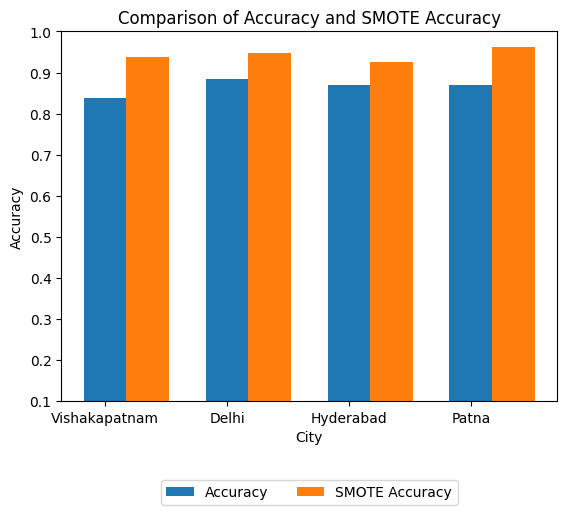

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [0.8390, 0.8831, 0.8708, 0.8691]
smote_accuracies = [0.9387, 0.9485, 0.9255, 0.9625]

# X-axis labels
labels = ['Vishakapatnam', 'Delhi', 'Hyderabad', 'Patna']
plt.figure(figsize=(3, 3))
# Plotting the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(labels, accuracies, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in range(len(labels))], smote_accuracies, bar_width, label='SMOTE Accuracy')

# Setting the y-axis labels from 0.1 to 1.0
ax.set_ylim(0.1, 1.0)
ax.set_yticks([i/10 for i in range(1, 11)])
ax.set_yticklabels([f'{i/10:.1f}' for i in range(1, 11)])

# Adding labels and title
ax.set_xlabel('City')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy and SMOTE Accuracy')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Show the plot
plt.show()

<Figure size 300x300 with 0 Axes>

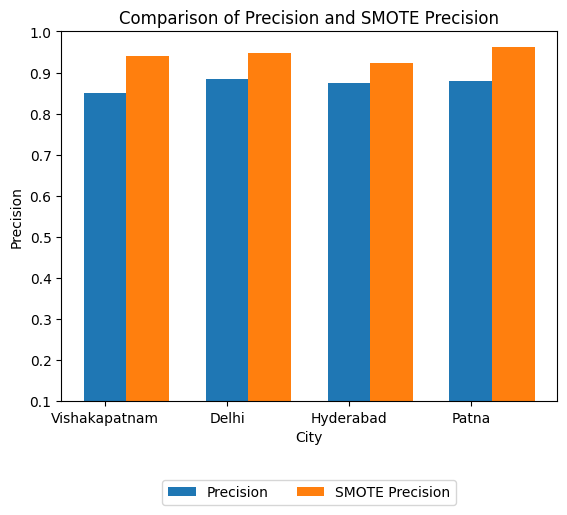

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
precision = [0.8508, 0.8839, 0.8736, 0.8789]
smote_precision = [0.9391, 0.9474, 0.9236, 0.9626]

# X-axis labels
labels = ['Vishakapatnam', 'Delhi', 'Hyderabad', 'Patna']
plt.figure(figsize=(3, 3))
# Plotting the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(labels, precision, bar_width, label='Precision')
bar2 = ax.bar([i + bar_width for i in range(len(labels))], smote_precision, bar_width, label='SMOTE Precision')

# Setting the y-axis labels from 0.1 to 1.0
ax.set_ylim(0.1, 1.0)
ax.set_yticks([i/10 for i in range(1, 11)])
ax.set_yticklabels([f'{i/10:.1f}' for i in range(1, 11)])

# Adding labels and title
ax.set_xlabel('City')
ax.set_ylabel('Precision')
ax.set_title('Comparison of Precision and SMOTE Precision')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Show the plot
plt.show()

<Figure size 300x300 with 0 Axes>

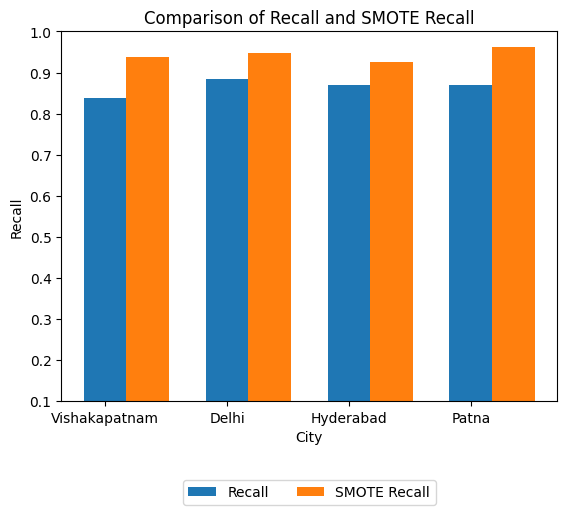

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
Recall = [0.8390, 0.8831, 0.8708, 0.8691]
smote_Recall = [0.9387, 0.9485, 0.9255, 0.9625]

# X-axis labels
labels = ['Vishakapatnam', 'Delhi', 'Hyderabad', 'Patna']
plt.figure(figsize=(3, 3))
# Plotting the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(labels, Recall, bar_width, label='Recall')
bar2 = ax.bar([i + bar_width for i in range(len(labels))], smote_Recall, bar_width, label='SMOTE Recall')

# Setting the y-axis labels from 0.1 to 1.0
ax.set_ylim(0.1, 1.0)
ax.set_yticks([i/10 for i in range(1, 11)])
ax.set_yticklabels([f'{i/10:.1f}' for i in range(1, 11)])

# Adding labels and title
ax.set_xlabel('City')
ax.set_ylabel('Recall')
ax.set_title('Comparison of Recall and SMOTE Recall')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Show the plot
plt.show()